<a href="https://colab.research.google.com/github/HalaShawky/Music-Analysis/blob/main/Music-Mood-Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

Throughout history, music and emotions have always been linked together, and music has always been part of how people express their feelings of sadness, happiness, hope, or excitement. Whether music can indeed influence the listener's emotions, or merely convey such emotion has been a point of debate for many years, however, the fact that both elements can be studied together is a subject many agree on. As technology advances, new methods of music analysis are being explored and refined, allowing us to have a better understanding of music and its emotional impact.

In this context, this project comes to explore and analyze the relationship of music to mood and the ability to predict mood through the features of music.

This project aims to create artificial intelligence models using features of music to analyze it and predict the resulting mood. Machine learning and data mining techniques will be used to analyze various musical features and determine the connection between them and the mood.

This project is expected to contribute to a better understanding of how can machine learning tools classify and predict listeners moods based on music features.

The dataset used in this project is obtained from Muharam, M. G. (2020). Spotify Music data to Identify the Moods (Version 1). Kaggle. https://www.kaggle.com/code/muhammadghazimuharam/music-mood-classification/input

# Business Understanding

Recently people have now been accustmed to recommendation systems in all sorts of media, like their online video and audio streaming services, their news feeds, and online retail options.

Our focus however will be on music subscription services that use recommendation systems to curate individual songs into personalized playlists according to a certain criteria, and in our case, it will be based on mood.

Our goal in this project is to build a predictive model that accurately categorizes music tracks into various moods.

This model can be used in the music recommendation systems that is utilized by many online music streaming applications.

# Data Understanding

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


This dataset uses the Spotify API for developers that makes use of their huge database of music for building interesting applications and studying people's music listening habits.  
**The columns are as follows:**  
* **name:** name of the track  
* **album:** name of the album   
* **artist:** name of artist   
* **id:** Spotify track id   
* **release_date:** release date of the track (yyyy-mm-dd)   
* **popularity:** the popularity of the track as an integer between 0 and 100, with 100 being the most popular
*   **length**: duration of a song in miliseconds (ms)
*   **danceability:** describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, and beat strength
* **acousticness:**  it is a measure that describes how acoustic a track is
* **energy:** represents a perceptual measure of intensity and activity
* **instrumentalness:**	Predicts whether a track contains no vocals
* **liveness:**	describes the presence of an audience in a musical recording
* **valence:** describes the musical positiveness of a track.
* **loudness:**	it is the overall loudness of a track in decibels (dB)
* **speechiness:** detects the presence of spoken words in a track
* **tempo:**	The overall estimated tempo of a track in beats per minute (BPM)
* **key:**  refers to the key of a track. The key is represented as an integer value and corresponds to the pitch class notation
* **time_signature:**	it is a numerical symbol that indicates the number of beats in a measure and the type of note that receives one beat
* **mood:** a subjective label assigned to each track, indicating the emotional tone or atmosphere conveyed by the music






In [38]:
url = 'https://raw.githubusercontent.com/HalaShawky/Music-Analysis/main/data_moods.csv?token=GHSAT0AAAAAACKVGEP4F65WOI3G5QSUXWWUZLV7HSQ'
df = pd.read_csv(url)
df

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,1982-10-27,68,379266,0.866,0.13700,0.7300,0.000000,0.0843,0.6250,-8.201,0.0767,118.523,5,4,Happy
1,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,2007-04-16,43,318800,0.381,0.01890,0.8320,0.196000,0.1530,0.1660,-5.069,0.0492,120.255,8,4,Sad
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,2006-11-06,60,217946,0.346,0.91300,0.1390,0.000077,0.0934,0.1160,-15.326,0.0321,136.168,0,4,Sad
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,1984-08-21,2,233000,0.466,0.08900,0.4380,0.000006,0.1130,0.5870,-12.858,0.0608,193.100,4,4,Happy
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,2004-01-01,60,268000,0.419,0.00171,0.9320,0.000000,0.1370,0.4450,-3.604,0.1060,169.881,1,4,Energetic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,windcatcher,windcatcher,Leo Nocta,59VApBbrS2IADQk4ml5mdo,2020-06-19,36,123066,0.402,0.96100,0.2360,0.919000,0.0921,0.1460,-20.615,0.0603,129.736,0,3,Calm
682,yellow is the color of her eyes,yellow is the color of her eyes,Soccer Mommy,4D3nttJPU6L0M2epr7sId6,2019-11-19,5,435080,0.452,0.75700,0.5150,0.120000,0.1400,0.1910,-7.351,0.0255,80.537,11,4,Sad
683,you broke me first,you broke me first,Tate McRae,45bE4HXI0AwGZXfZtMp8JR,2020-04-17,87,169265,0.642,0.78600,0.3740,0.000000,0.0906,0.0799,-9.386,0.0545,124.099,4,4,Sad
684,you were good to me,brent,Jeremy Zucker,4CxFN5zON70B3VOPBYbd6P,2019-05-03,76,219146,0.561,0.91300,0.0848,0.000026,0.1120,0.2060,-15.099,0.0404,102.128,2,4,Sad


**This dataset classifies music into four moods: sad, happy, energetic and calm, with the total number of tracks being 686**

In [31]:
df2 = pd.unique(df['mood'].values.ravel())
print("Unique values in the 'mood' column:\n",df2)

Unique values in the 'mood' column:
 ['Happy' 'Sad' 'Energetic' 'Calm']


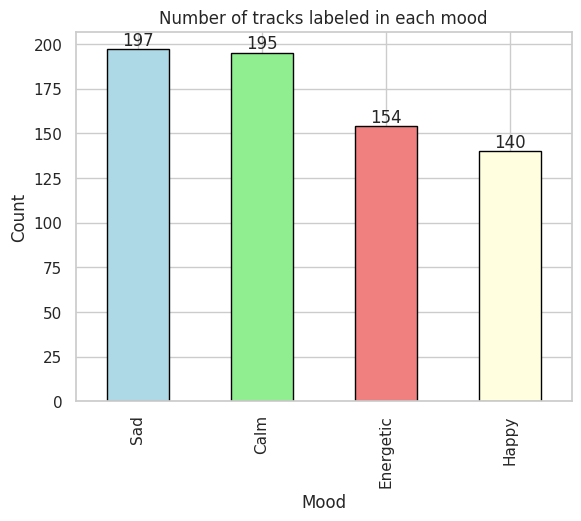

In [32]:
category_counts = df['mood'].value_counts()
colors = ['lightblue', 'lightgreen','lightcoral', 'lightyellow']
ax = category_counts.plot(kind='bar', color=colors, edgecolor='black')
for i, v in enumerate(category_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')
plt.title('Number of tracks labeled in each mood')
plt.xlabel('Mood')
plt.ylabel('Count')
plt.show()

**It is also shown that there are no null values in the dataset that needs to be handled**

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              686 non-null    object 
 1   album             686 non-null    object 
 2   artist            686 non-null    object 
 3   id                686 non-null    object 
 4   release_date      686 non-null    object 
 5   popularity        686 non-null    int64  
 6   length            686 non-null    int64  
 7   danceability      686 non-null    float64
 8   acousticness      686 non-null    float64
 9   energy            686 non-null    float64
 10  instrumentalness  686 non-null    float64
 11  liveness          686 non-null    float64
 12  valence           686 non-null    float64
 13  loudness          686 non-null    float64
 14  speechiness       686 non-null    float64
 15  tempo             686 non-null    float64
 16  key               686 non-null    int64  
 1

In [34]:
df.isnull().sum()

name                0
album               0
artist              0
id                  0
release_date        0
popularity          0
length              0
danceability        0
acousticness        0
energy              0
instrumentalness    0
liveness            0
valence             0
loudness            0
speechiness         0
tempo               0
key                 0
time_signature      0
mood                0
dtype: int64

**Doing  a simple analysis we can look at the mean value of all our attributes for each mood:**

In [35]:
numeric_columns = df.select_dtypes(include='number')

mean_values = numeric_columns.groupby(df['mood']).mean()

print(mean_values)

           popularity         length  danceability  acousticness    energy  \
mood                                                                         
Calm        40.261538  193977.061538      0.406815      0.883348  0.156325   
Energetic   41.603896  215779.948052      0.512240      0.028229  0.883669   
Happy       48.585714  230963.850000      0.622914      0.127849  0.751857   
Sad         37.730964  247504.472081      0.497245      0.578826  0.388068   

           instrumentalness  liveness   valence   loudness  speechiness  \
mood                                                                      
Calm               0.890769  0.115418  0.151421 -20.955826     0.040742   
Energetic          0.056607  0.233897  0.437049  -4.695844     0.079170   
Happy              0.126103  0.201682  0.579095  -7.275750     0.061774   
Sad                0.201832  0.140655  0.289372 -10.569183     0.041736   

                tempo       key  time_signature  
mood                          


**As shown in the above data:**


* Happy mood has the highest average danceability, followed by Energetic, Sad, and Calm

* Calm mood has the highest average acousticness, indicating a tendency towards more acoustic or less electronic sounds. Energetic has the lowest average acousticness

* Energetic mood has the highest average energy, suggesting more lively and energetic tracks. Calm has the lowest energy

* Calm mood has the highest average instrumentalness, suggesting a tendency towards instrumental tracks. Energetic has the lowest average instrumentalness

* Happy mood has the highest average valence, representing the musical positiveness. Sad has the lowest valence

* Calm mood has the lowest average loudness, while Energetic has the highest, indicating a preference for louder tracks in the Energetic mood



# Data Preparation

As mentioned before, we want to study the relationship between mood and music features so we want to exclude attributes that will not be relevant to our mood prediction model.
Attributes that are not directly a musical acoustic feature will be removed like the track name, id, album name, artist, release date, popularity, length and time signature.

In [39]:
df.drop(['name', 'album','artist','id','release_date','popularity','length','liveness','time_signature'], axis=1, inplace = True)
df.head()

,danceability,acousticness,energy,instrumentalness,valence,loudness,speechiness,tempo,key,mood
0,0.866,0.13700,0.730,0.000000,0.625,-8.201,0.0767,118.523,5,Happy
1,0.381,0.01890,0.832,0.196000,0.166,-5.069,0.0492,120.255,8,Sad
2,0.346,0.91300,0.139,0.000077,0.116,-15.326,0.0321,136.168,0,Sad
3,0.466,0.08900,0.438,0.000006,0.587,-12.858,0.0608,193.100,4,Happy
4,0.419,0.00171,0.932,0.000000,0.445,-3.604,0.1060,169.881,1,Energetic


**There are also no duplicate values nor missing values**

In [43]:
num_duplicates = df.duplicated().sum()
num_null = df.isnull().sum()
print(f"\nNumber of Duplicate Rows: {num_duplicates}")
print(f"\nNumber of Null Values: \n{num_null}")



Number of Duplicate Rows: 0

Number of Null Values: 
danceability        0
acousticness        0
energy              0
instrumentalness    0
valence             0
loudness            0
speechiness         0
tempo               0
key                 0
mood                0
dtype: int64


Modeling




In [ ]:
modeldf = df
modeldf.head()

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,1982-10-27,68,379266,0.866,0.13700,0.730,0.000000,0.0843,0.625,-8.201,0.0767,118.523,5,4,Happy
1,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,2007-04-16,43,318800,0.381,0.01890,0.832,0.196000,0.1530,0.166,-5.069,0.0492,120.255,8,4,Sad
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,2006-11-06,60,217946,0.346,0.91300,0.139,0.000077,0.0934,0.116,-15.326,0.0321,136.168,0,4,Sad
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,1984-08-21,2,233000,0.466,0.08900,0.438,0.000006,0.1130,0.587,-12.858,0.0608,193.100,4,4,Happy
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,2004-01-01,60,268000,0.419,0.00171,0.932,0.000000,0.1370,0.445,-3.604,0.1060,169.881,1,4,Energetic


In [ ]:
modeldf = modeldf.drop(['name', 'album','artist','id','release_date','popularity','length','time_signature'], axis=1)
modeldf.head()

,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,mood
0,0.866,0.13700,0.730,0.000000,0.0843,0.625,-8.201,0.0767,118.523,5,Happy
1,0.381,0.01890,0.832,0.196000,0.1530,0.166,-5.069,0.0492,120.255,8,Sad
2,0.346,0.91300,0.139,0.000077,0.0934,0.116,-15.326,0.0321,136.168,0,Sad
3,0.466,0.08900,0.438,0.000006,0.1130,0.587,-12.858,0.0608,193.100,4,Happy
4,0.419,0.00171,0.932,0.000000,0.1370,0.445,-3.604,0.1060,169.881,1,Energetic


In [ ]:
modeldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      686 non-null    float64
 1   acousticness      686 non-null    float64
 2   energy            686 non-null    float64
 3   instrumentalness  686 non-null    float64
 4   liveness          686 non-null    float64
 5   valence           686 non-null    float64
 6   loudness          686 non-null    float64
 7   speechiness       686 non-null    float64
 8   tempo             686 non-null    float64
 9   key               686 non-null    int64  
 10  mood              686 non-null    object 
dtypes: float64(9), int64(1), object(1)
memory usage: 59.1+ KB


In [ ]:
modeldf['mood'].unique()

array(['Happy', 'Sad', 'Energetic', 'Calm'], dtype=object)

# Modeling

In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
modeldf['mood']= label_encoder.fit_transform(modeldf['mood'])

modeldf['mood'].unique()

array([2, 3, 1, 0])

In [ ]:
labels = modeldf.pop('mood')

In [ ]:
from sklearn.model_selection import train_test_split
# 'test_size' specifies the percentage of the data used for testing (here, 20%)
X_train, X_test, y_train, y_test = train_test_split(modeldf, labels, test_size=0.2)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rf.score(X_test,y_test)

0.8043478260869565

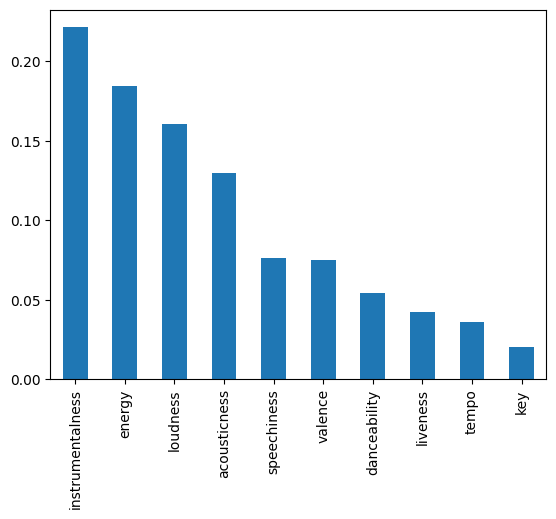

In [ ]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Create a Random Forest Classifier
feature_test_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to your training data
feature_test_rf.fit(X_train, y_train)

# Use SelectFromModel to extract the most important features
sfm = SelectFromModel(feature_test_rf, threshold='median')
sfm.fit(X_train, y_train)

# Transform the data to retain only the selected features
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

# Get the selected feature names
selected_feature_names = X_train.columns[sfm.get_support()]

# Create a new Random Forest Classifier using the selected features
rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selected.fit(X_train_selected, y_train)

# Evaluate the model using the selected features
accuracy = rf_selected.score(X_test_selected, y_test)
print("Accuracy with selected features:", accuracy)
print("Selected features:", selected_feature_names)

Accuracy with selected features: 0.7898550724637681
Selected features: Index(['acousticness', 'energy', 'instrumentalness', 'valence', 'loudness'], dtype='object')


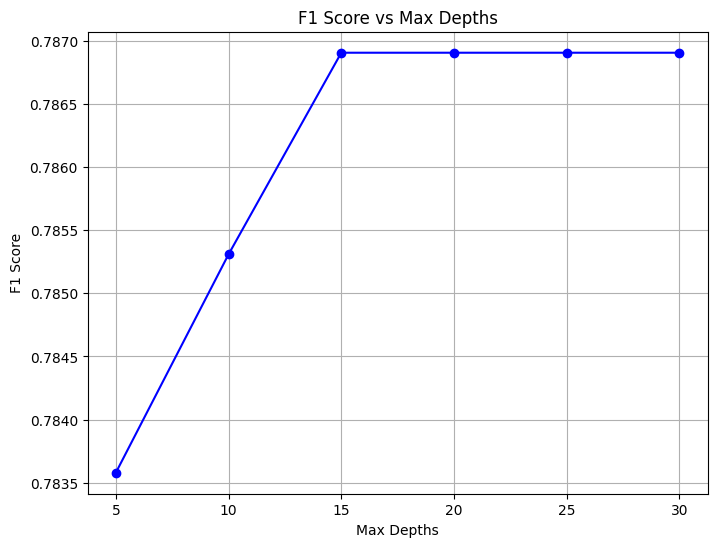

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

# Assuming you have your data and targets loaded as X and y

max_depths = [5, 10, 15, 20, 25, 30]  # Define the different max_depth values
f1_scores = []

for depth in max_depths:
    # Create the Random Forest Classifier with different max_depth values
    clf = RandomForestClassifier(max_depth=depth, random_state=42)



    # Train the model
    clf.fit(X_train, y_train)

    # Predict using the test set
    y_pred = clf.predict(X_test)

    # Calculate F1 score
    f1 = f1_score(y_test, y_pred, average='weighted')  # Change 'weighted' if needed

    # Append F1 score to the list
    f1_scores.append(f1)

# Plotting the graph
plt.figure(figsize=(8, 6))
plt.plot(max_depths, f1_scores, marker='o', linestyle='-', color='b')
plt.title('F1 Score vs Max Depths')
plt.xlabel('Max Depths')
plt.ylabel('F1 Score')
plt.xticks(max_depths)
plt.grid(True)
plt.show()

In [ ]:
modeldf.drop(['danceability', 'liveness','speechiness','tempo','key'], axis=1,inplace=True)
modeldf.head()

,acousticness,energy,instrumentalness,valence,loudness
0,0.13700,0.730,0.000000,0.625,-8.201
1,0.01890,0.832,0.196000,0.166,-5.069
2,0.91300,0.139,0.000077,0.116,-15.326
3,0.08900,0.438,0.000006,0.587,-12.858
4,0.00171,0.932,0.000000,0.445,-3.604


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(modeldf, labels, test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfnew = RandomForestClassifier()
rfnew.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rfnew.score(X_test,y_test)

0.7898550724637681

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ccc15eb2590>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ccc15ce8dc0>})

In [ ]:
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 9, 'n_estimators': 425}


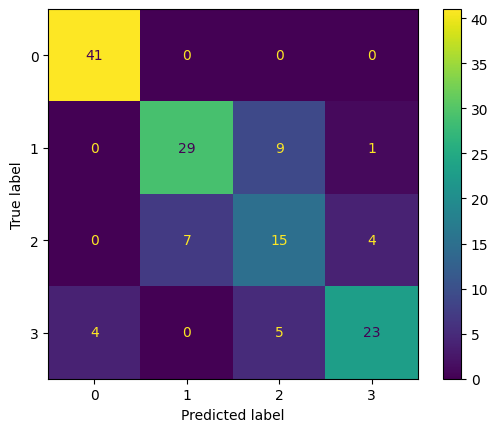

In [ ]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)



print("Accuracy:", accuracy)


Accuracy: 0.782608695652174


Optimal KNN Model Accuracy: 0.81
Best Hyperparameters: {'n_neighbors': 7, 'weights': 'uniform'}


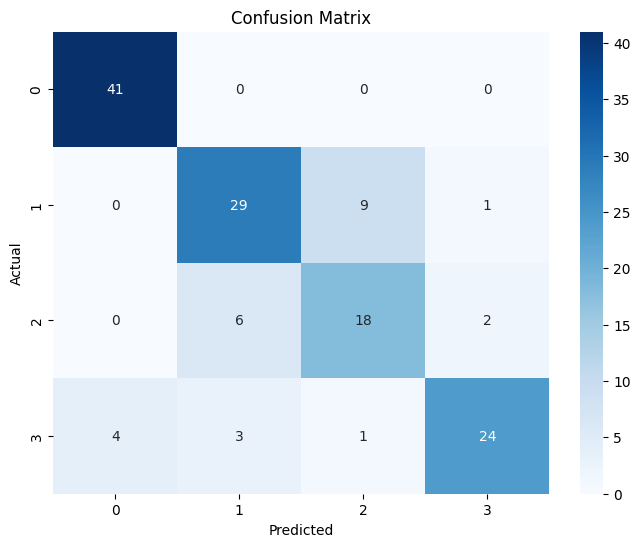

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Standardize the features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a KNN classifier
knn_classifier = KNeighborsClassifier()

# Define a parameter grid for hyperparameter tuning
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best model from the grid search
best_knn_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_knn_model.predict(X_test_scaled)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimal KNN Model Accuracy: {accuracy:.2f}")
print("Best Hyperparameters:", grid_search.best_params_)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=best_knn_model.classes_, yticklabels=best_knn_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Evaluation